In [107]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [111]:
train = pd.read_csv('mental_train.csv')

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [113]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


CGPA : 누적 성적 평점
Degree : 전공/ 학위

In [114]:
train['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [115]:
train['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [116]:
train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [117]:
train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [118]:
train['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

In [119]:
train['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    14199
11.0    12832
9.0     12711
0.0     12066
12.0    11409
2.0     10595
6.0     10432
7.0      9872
1.0      9802
3.0      9474
5.0      9337
4.0      9065
8.0      8906
Name: count, dtype: int64

<Axes: xlabel='Depression', ylabel='count'>

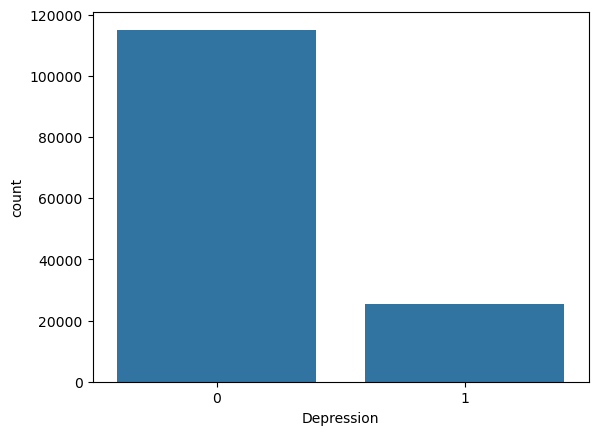

In [120]:
sns.countplot(x='Depression', data=train)

고민해볼 문제:

Profession,Sleep Duration, Age처리 방법 
-> 그냥 삭제하는게 나아보임


결측치 처리방법 (평균값으로 대체할지 0으로 대체할지 삭제할지)

In [121]:
train = train.drop(['Name', 'City', 'Profession', 'Sleep Duration', 'Age', 'Degree','id'], axis=1)

In [122]:
train

,Gender,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,Working Professional,NaN,5.0,NaN,NaN,2.0,Healthy,No,1.0,2.0,No,0
1,Male,Working Professional,NaN,4.0,NaN,NaN,3.0,Unhealthy,Yes,7.0,3.0,No,1
2,Male,Student,5.0,NaN,8.97,2.0,NaN,Healthy,Yes,3.0,1.0,No,1
3,Male,Working Professional,NaN,5.0,NaN,NaN,1.0,Moderate,Yes,10.0,1.0,Yes,1
4,Female,Working Professional,NaN,1.0,NaN,NaN,1.0,Unhealthy,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,Working Professional,NaN,5.0,NaN,NaN,4.0,Unhealthy,No,2.0,4.0,Yes,1
140696,Female,Working Professional,NaN,5.0,NaN,NaN,4.0,Moderate,Yes,6.0,5.0,Yes,0
140697,Female,Working Professional,NaN,3.0,NaN,NaN,1.0,Moderate,No,4.0,4.0,No,0
140698,Female,Working Professional,NaN,5.0,NaN,NaN,2.0,Moderate,Yes,10.0,1.0,No,0


In [123]:
condition_to_drop = (train['Working Professional or Student'] == 'Student') & (train['Study Satisfaction'].isna())
indices_to_drop = train[condition_to_drop].index
train_updated = train.drop(indices_to_drop)

train_updated

,Gender,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,Working Professional,NaN,5.0,NaN,NaN,2.0,Healthy,No,1.0,2.0,No,0
1,Male,Working Professional,NaN,4.0,NaN,NaN,3.0,Unhealthy,Yes,7.0,3.0,No,1
2,Male,Student,5.0,NaN,8.97,2.0,NaN,Healthy,Yes,3.0,1.0,No,1
3,Male,Working Professional,NaN,5.0,NaN,NaN,1.0,Moderate,Yes,10.0,1.0,Yes,1
4,Female,Working Professional,NaN,1.0,NaN,NaN,1.0,Unhealthy,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,Working Professional,NaN,5.0,NaN,NaN,4.0,Unhealthy,No,2.0,4.0,Yes,1
140696,Female,Working Professional,NaN,5.0,NaN,NaN,4.0,Moderate,Yes,6.0,5.0,Yes,0
140697,Female,Working Professional,NaN,3.0,NaN,NaN,1.0,Moderate,No,4.0,4.0,No,0
140698,Female,Working Professional,NaN,5.0,NaN,NaN,2.0,Moderate,Yes,10.0,1.0,No,0


In [124]:
condition_to_drop2 = (train['Working Professional or Student'] == 'Working Professional') & (train['Job Satisfaction'].isna())
indices_to_drop2 = train[condition_to_drop2].index
train_updated2 = train.drop(indices_to_drop2)


train = train_updated2

In [125]:
train['Academic Pressure'] = train['Academic Pressure'].fillna(0)
train['Work Pressure'] = train['Work Pressure'].fillna(0)
train['CGPA'] = train['CGPA'].fillna(0)
train['Study Satisfaction'] = train['Study Satisfaction'].fillna(0)
train['Job Satisfaction'] = train['Job Satisfaction'].fillna(0)

train.isna().sum()

Gender                                   0
Working Professional or Student          0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Dietary Habits                           4
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         4
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [126]:
condition_to_drop3 = train['Dietary Habits'].isna()
indices_to_drop3 = train[condition_to_drop3].index
train_updated3 = train.drop(indices_to_drop3)

train = train_updated3

In [127]:
condition_to_drop4 = train['Financial Stress'].isna()
indices_to_drop4 = train[condition_to_drop4].index
train_updated4 = train.drop(indices_to_drop4)

train = train_updated4

In [128]:
train.isna().sum()

Gender                                   0
Working Professional or Student          0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [129]:
habits = ['Moderate','Healthy','Unhealthy']

train_filtered = train[train['Dietary Habits'].isin(habits)]
train_filtered

train = train_filtered

In [130]:
train

,Gender,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,Working Professional,0.0,5.0,0.00,0.0,2.0,Healthy,No,1.0,2.0,No,0
1,Male,Working Professional,0.0,4.0,0.00,0.0,3.0,Unhealthy,Yes,7.0,3.0,No,1
2,Male,Student,5.0,0.0,8.97,2.0,0.0,Healthy,Yes,3.0,1.0,No,1
3,Male,Working Professional,0.0,5.0,0.00,0.0,1.0,Moderate,Yes,10.0,1.0,Yes,1
4,Female,Working Professional,0.0,1.0,0.00,0.0,1.0,Unhealthy,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,Working Professional,0.0,5.0,0.00,0.0,4.0,Unhealthy,No,2.0,4.0,Yes,1
140696,Female,Working Professional,0.0,5.0,0.00,0.0,4.0,Moderate,Yes,6.0,5.0,Yes,0
140697,Female,Working Professional,0.0,3.0,0.00,0.0,1.0,Moderate,No,4.0,4.0,No,0
140698,Female,Working Professional,0.0,5.0,0.00,0.0,2.0,Moderate,Yes,10.0,1.0,No,0


In [131]:
cat_columns=['Gender', 'Working Professional or Student', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
num_columns=['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

In [132]:
cat_columns, num_columns

(['Gender',
  'Working Professional or Student',
  'Dietary Habits',
  'Have you ever had suicidal thoughts ?',
  'Family History of Mental Illness'],
 ['Academic Pressure',
  'Work Pressure',
  'Study Satisfaction',
  'Job Satisfaction',
  'Work/Study Hours',
  'Financial Stress'])

In [133]:
X=train.drop('Depression',axis=1)
y=train['Depression'].copy()

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [135]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_columns), 
        ('cat', categorical_transformer, cat_columns)
    ],
    remainder='passthrough' 
)

preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [136]:
XGB=XGBClassifier( n_estimators=100,       
    max_depth=4,            
    learning_rate=0.1,      
    subsample=0.8,          
    colsample_bytree=0.8,   
    use_label_encoder=False,
    eval_metric='logloss',  
    random_state=42,
    n_jobs=-1)       

In [137]:
XGB.fit(X_train_processed,y_train)
y_predict_3 = XGB.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test,y_predict_3))

C:\ananconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:51:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9135828800966905


In [158]:
test = pd.read_csv('mental_test.csv')

In [159]:
test = test.drop(['Name', 'City', 'Profession', 'Sleep Duration', 'Age', 'Degree'], axis=1)

test['Academic Pressure'] = test['Academic Pressure'].fillna(0)
test['Work Pressure'] = test['Work Pressure'].fillna(0)
test['CGPA'] = test['CGPA'].fillna(0)
test['Study Satisfaction'] = test['Study Satisfaction'].fillna(0)
test['Job Satisfaction'] = test['Job Satisfaction'].fillna(0)

test_id=test.id

test = test.drop(['id'],axis=1)

In [160]:
test_processed=preprocessor.transform(test)

In [161]:
y_test_predict=XGB.predict(test_processed)

In [162]:
submission=pd.DataFrame({'id':test_id,'predict':y_test_predict})
submission.to_csv('Submission_mental_health1.csv',index=False)